# 6.11 - Back Propagation - with bias
1. Initialise
1. Forward Pass
1. Calculate error
1. Calculate Gradient
1. Update weights using backprop
1. Put a note in about mse and classification...

## 1. Setup...

### 1.1 Create Data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, 
                           n_clusters_per_class=1, 
                           n_classes=2,
                           n_features=1,
                           n_informative = 1, 
                           n_redundant = 0,
                           random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [4]:
labels = { 0: "dogs", 1: "cats"}

idx_class_0 = y_train == 0 
idx_class_1 = y_train == 1 

In [5]:
X.shape

(100, 1)

### 1.2 Plot Data

TODO: add jitter with seaborn?

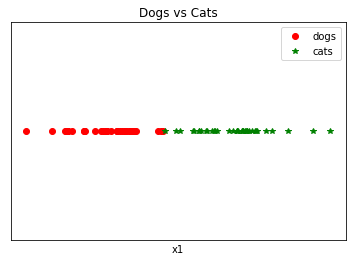

In [6]:
plt.plot(X_train[idx_class_0, 0], np.zeros_like(X_train[idx_class_0, 0]), 
         'ro', label=labels[0])
plt.plot(X_train[idx_class_1, 0], np.zeros_like(X_train[idx_class_1, 0]), 
         'g*', label=labels[1])
plt.gca().axes.get_yaxis().set_visible(False)

plt.title("Dogs vs Cats")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xticks([])
plt.yticks([])
plt.legend()
plt.show()

## 2. Forward Pass

TODO: image of network...

In [7]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

def hidden_layer_activation(x, w1, b0=0):
    z1 = (x * w1) + b0
    a1 = sigmoid(z1)
    return z1, a1

def output_layer_activation(a1, w2):
    z2 = a1 * w2
    a2 = sigmoid(z2)
    return z2, a2

def forward_pass(x, w1, w2, b0):
    
    z1, a1 = hidden_layer_activation(x, w1, b0)
    z2, a2 = output_layer_activation(a1, w2)
    return (z1, a1, z2, a2)


In [8]:
b0 = 0
w1 = 1.5
w2 = 1.7
(z1, a1, z2, a2) = forward_pass(X_train.reshape(-1), w1, w2, b0)

In [9]:
a2.shape

(75,)

## 3. Calculate Loss

In [10]:
def mse_loss(a2, y):
    loss = 1/2 * np.mean((a2 - y)**2)
    return loss

mse_loss(a2, y_train)

0.09665120606212119

## 4. Calculate gradients using Backprop

In [11]:
def backprop(x, y, w1, w2, z1, z2, a1, a2, b0):
    
    dL_a2 = a2 - y
    da2_z2 = sigmoid(z2) * (1 - sigmoid(z2))
    dz2_w2 = a1
    dz2_a1 = w2
    da1_z1 = sigmoid(z1) * (1 - sigmoid(z1))
    dz1_w1 = x
    dz1_b0 = 1

    dL_w2 = np.mean(dL_a2 * da2_z2 * dz2_w2)
    dL_w1 = np.mean(dL_a2 * da2_z2 * dz2_a1 * da1_z1 * dz1_w1)
    dL_b0 = np.mean(dL_a2 * da2_z2 * dz2_a1 * da1_z1 * dz1_b0)
    
    return dL_w2, dL_w1, dL_b0

In [12]:
dL_w2, dL_w1, dL_b0 = backprop(X_train.reshape(-1), y_train.reshape(-1), w1, w2, z1, z2, a1, a2, b0)
print("dL_w2:", dL_w2)
print("dL_w1:", dL_w1)
print("dL_b0:", dL_b0)

dL_w2: 0.0011501715449302185
dL_w1: -0.01796487177201214
dL_b0: 0.01307478054643515


## 5. Update network weights

In [13]:
def get_new_weights(w1, w2, dL_w1, dL_w2, b0, dL_b0, learning_rate):
    w1 = w1 - learning_rate * dL_w1
    w2 = w2 - learning_rate * dL_w2
    b0 = b0 - learning_rate * dL_b0
    return w1, w2, b0
   
    
learning_rate = 0.3    
print(get_new_weights(w1, w2, dL_w1, dL_w2, b0, dL_b0, learning_rate))

(1.5053894615316037, 1.6996549485365209, -0.003922434163930545)


## 6. Repeats steps 2 to 5

In [63]:
def evaluate_validation_loss(X_test, y_test, w1, w2, b0):
    _, _, _, a2 = forward_pass(X_test.reshape(-1), w1, w2, b0)
    loss = mse_loss(a2, y_test)
    return loss
    
training_losses = np.array([])
validation_losses = np.array([])    

In [73]:
for i in range(1, 5000):
    
    ## 1. forward pass
    (z1, a1, z2, a2) = forward_pass(X_train.reshape(-1), w1, w2, b0)

    ## 2. Loss
    loss = mse_loss(a2, y_train)

    ## 3. Gradient Calculation with Backprop
    dL_w2, dL_w1, dL_b0 = backprop(X_train.reshape(-1), y_train.reshape(-1), w1, w2, z1, z2, a1, a2, b0)

    ## 4. Update Weights
    w1, w2, b0 = get_new_weights(w1, w2, dL_w1, dL_w2, b0, dL_b0, learning_rate)
    
    ## 5. Evaluate on validation set
    val_loss = evaluate_validation_loss(X_test, y_test, w1, w2, b0)
    
    ## 6. Save losses for review later.
    training_losses = np.append(training_losses, loss)
    validation_losses = np.append(validation_losses, val_loss)


### Print training loss

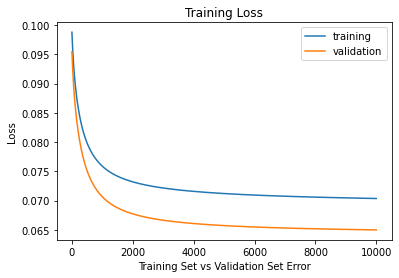

In [74]:
plt.plot(training_losses, label='training')
plt.plot(validation_losses, label='validation')
plt.title("Training Loss")
plt.xlabel("Training Set vs Validation Set Error")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [75]:
z1, a1, z2, a2 = forward_pass(X_train.reshape(-1), w1, w2, b0)

In [76]:
a2[0:5]

array([0.59656565, 0.98405154, 0.50000584, 0.50223689, 0.50024795])

In [77]:
y_train[0:5]

array([1, 1, 0, 0, 0])

In [78]:
a2[0:5]

array([0.59656565, 0.98405154, 0.50000584, 0.50223689, 0.50024795])

In [79]:
dL_w2, dL_w1, dL_b0

(-0.0002502643320773926, -0.00045956738769697394, 0.00022428806810925354)

In [80]:
loss

0.0703525196438862

In [82]:
w2, w1, b0

(4.122557432107965, 5.715647401301501, -2.7780816237502473)